## Loading and using a trained model
Notebook demonstrating how to load a JointVAE model and use it for various things.

In [1]:
from utils.load_model import load

path_to_model_folder = './trained_models/mnist/'

model = load(path_to_model_folder)

### Look at architecture and latent spec

In [3]:
# Print the latent distribution info
print(model.latent_spec)

{u'disc': [10], u'cont': 10}


In [4]:
# Print model architecture
print(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=10, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=10, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=20, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv

### Visualize various aspects of the model

In [7]:
from viz.visualize import Visualizer as Viz

# Create a Visualizer for the model
viz = Viz(model)
viz.save_images = False  # Return tensors instead of saving images

#### Samples
Plot generated samples from the model

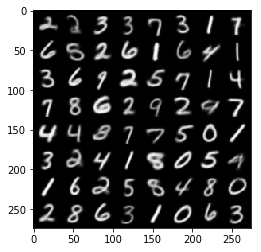

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

samples = viz.samples()
plt.imshow(samples.numpy()[0, :, :], cmap='gray')

#### All latent traversals

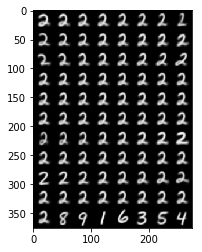

In [10]:
traversals = viz.all_latent_traversals()
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

#### Plot a grid of two interesting traversals

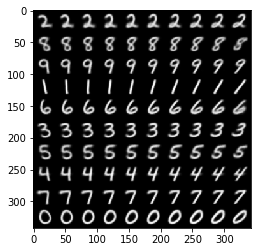

In [19]:
# Traverse 3rd continuous latent dimension across columns and first 
# discrete latent dimension across rows
traversals = viz.latent_traversal_grid(cont_idx=2, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

#### Reorder discrete latent to match order of digits 

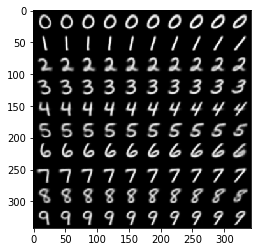

In [20]:
from viz.visualize import reorder_img

ordering = [9, 3, 0, 5, 7, 6, 4, 8, 1, 2]  # The 9th dimension corresponds to 0, the 3rd to 1 etc...
traversals = reorder_img(traversals, ordering, by_row=True)
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')

#### Plot traversal of single dimension

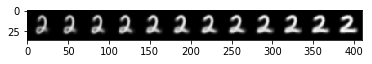

In [22]:
traversal = viz.latent_traversal_line(cont_idx=6, size=12)
plt.imshow(traversal.numpy()[0, :, :], cmap='gray')

#### Plot reconstructions

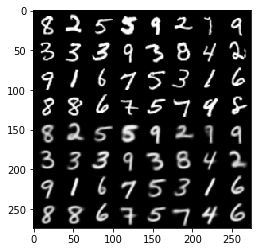

In [25]:
from utils.dataloaders import get_mnist_dataloaders

# Get MNIST test data
_, dataloader = get_mnist_dataloaders(batch_size=32)

# Extract a batch of data
for batch, labels in dataloader:
    break
    
recon = viz.reconstructions(batch, size=(8, 8))

plt.imshow(recon.numpy()[0, :, :], cmap='gray')

### Encode data
The model can also be used to get encodings of the data

In [26]:
from torch.autograd import Variable
encodings = model.encode(Variable(batch))

In [28]:
# Continuous encodings for the first 5 examples
encodings['cont'][0][:5]

Variable containing:
-0.0647  0.7247 -0.7522 -0.0080  0.0068 -0.0272 -0.1542 -0.0002 -0.1286 -0.0017
-0.2259 -0.7637  0.0877  0.0081 -0.0069 -0.0222  0.4347  0.0151  0.2120 -0.0072
-0.6189  0.4812  0.6814 -0.0201 -0.0065 -0.0204 -0.8321  0.0222  1.5854 -0.0015
-0.7368  2.2919  0.1809 -0.0270  0.0056 -0.0050  1.0453  0.0185  0.0787  0.0063
 1.1803  0.8411 -0.5435 -0.0098 -0.0118 -0.0025  1.5565  0.0014  0.3677 -0.0121
[torch.FloatTensor of size 5x10]